## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(".\data\diabetes.tsv",sep='\t')
df.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [2]:
df.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

In [3]:
pd.DataFrame([df.mean(),df.var()],index=['Mean','Variance']).head()


AGE       SEX        BMI          BP           S1          S2  \
Mean       48.51810  1.468326  26.375792   94.647014   189.140271  115.439140   
Variance  171.84661  0.249561  19.519798  191.304401  1197.717241  924.955494   

                  S3        S4        S5          S6            Y  
Mean       49.788462  4.070249  4.641411   91.260181   152.133484  
Variance  167.293585  1.665261  0.272892  132.165712  5943.331348

In [9]:
df.mean()

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

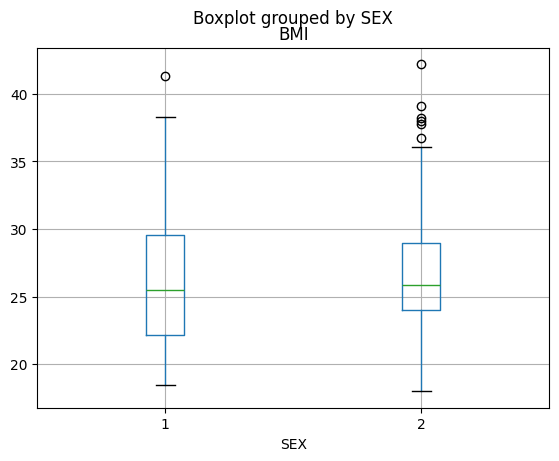

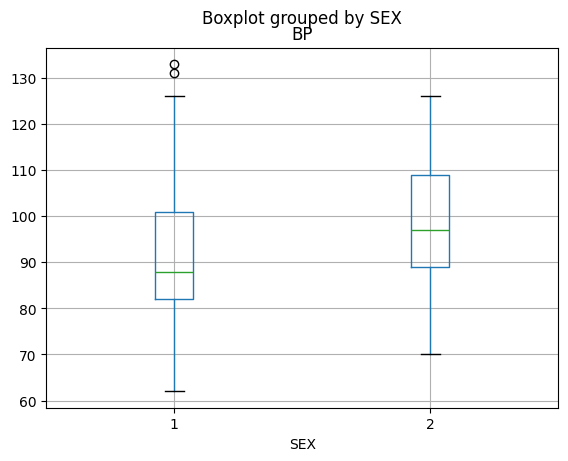

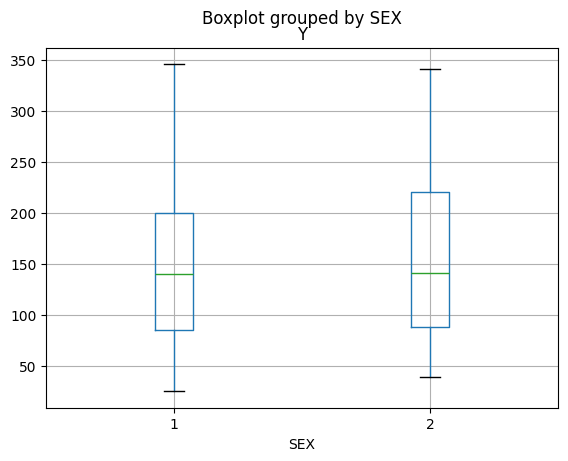

In [14]:
for col in ['BMI','BP','Y']:
    df.boxplot(column=col,by='SEX')
    plt.show()

The boxplots above display the distribution of BMI, BP, and Y (disease progression) for each gender group in the dataset. Each boxplot summarizes the median, quartiles, and potential outliers for the selected variable, separated by the 'SEX' column (where typically 1 = male, 2 = female). This visualization helps compare the central tendency and spread of these health indicators between men and women, highlighting any differences or similarities in their distributions.

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

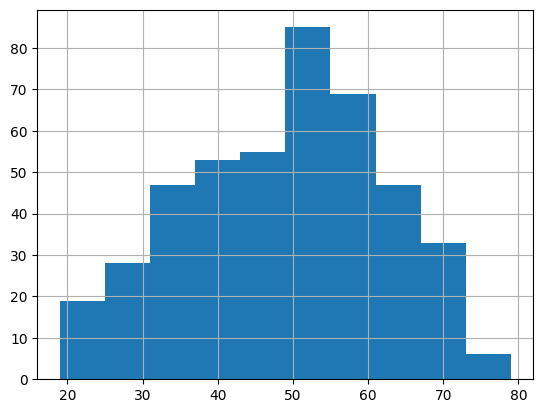

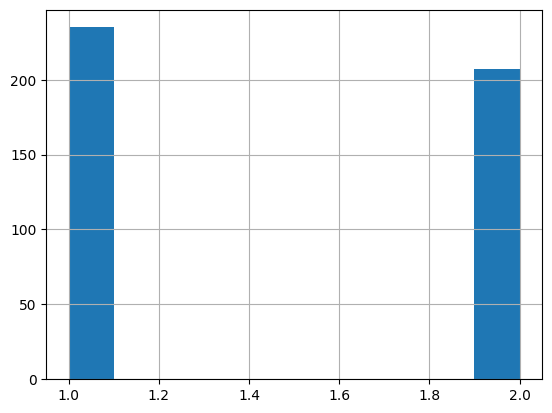

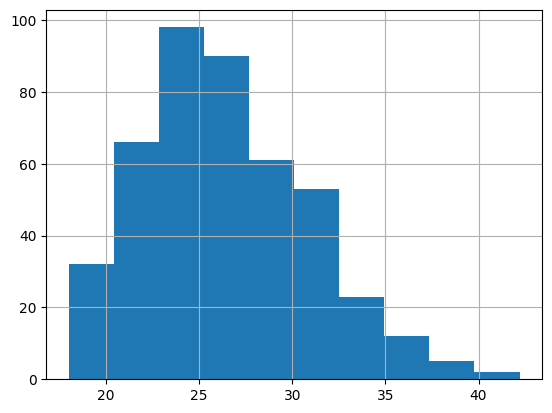

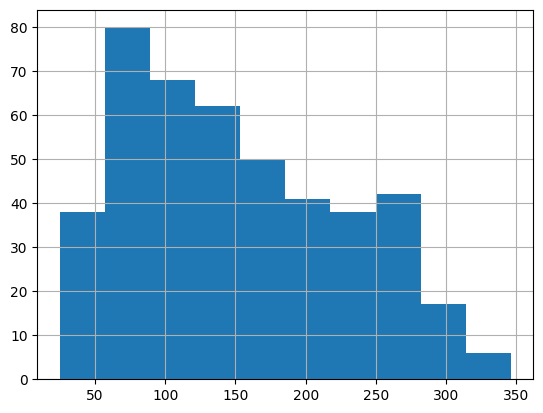

In [15]:
for col in ['AGE','SEX','BMI','Y']:
    df[col].hist()
    plt.show()

The charts above show the distributions of the variables AGE, SEX, BMI, and Y in the dataset.

- **Distribution charts** (like histograms) help us see how data is spread outâ€”where most values are, and if there are any unusual values (outliers).
- For example, a histogram of AGE shows how many patients are in each age group.
- The BMI and Y histograms show if most people have similar values or if the data is spread out.
- The SEX chart shows how many males and females are in the dataset.

**Why use distribution charts?**
- They make it easy to spot patterns, like if most patients are in a certain age range or if disease progression (Y) is higher for some groups.
- They help us quickly see if the data is balanced or if there are more of one group (like more males than females).
- Understanding distributions is important before doing further analysis, so we know what our data looks like.

**In summary:**  
Distribution charts give a simple visual summary of the data, making it easier to understand and compare different variables.

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [16]:
df.corr()

AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.301731  0.187889  
SEX  0.332115  0.149916  0.208133  0.043062  
BMI  0.413807  0.446157  0.388680  0.586450  
BP   0.257650  0.393480  0.390430  0.441482  
S1   0.542207  0.515503  0.325717  0.212022  
S2   0.659817  0.318357  0.290600  0.174054  
S3  -0.738493 -0.398577 -0.273697 -0.394789  
S4   1.000000  0.617859  0.417212  0.430453  
S5   0.617859  1.000000  0.464669  0.565883  
S6   0.417212  0.464669  1.000000  0.382483  
Y    0.430453  0.565883  0.382483  1.000000

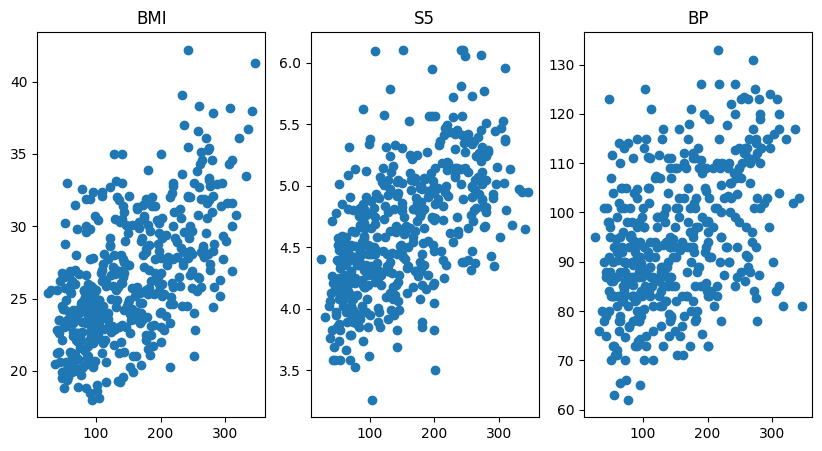

In [17]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
for i,n in enumerate(['BMI','S5','BP']):
    ax[i].scatter(df['Y'],df[n])
    ax[i].set_title(n)
plt.show()

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [19]:
!pip install scipy

   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.2 MB ? eta -:--:--
   - -------------------------------------- 1.3/41.2 MB 4.8 MB/s eta 0:00:09
   -- ------------------------------------- 2.1/41.2 MB 6.2 MB/s eta 0:00:07
   -- ------------------------------------- 2.9/41.2 MB 4.3 MB/s eta 0:00:09
   --- ------------------------------------ 3.4/41.2 MB 3.7 MB/s eta 0:00:11
   --- ------------------------------------ 3.9/41.2 MB 3.6 MB/s eta 0:00:11
   ---- ----------------------------------- 4.2/41.2 MB 3.5 MB/s eta 0:00:11
   ---- ----------------------------------- 4.7/41.2 MB 3.1 MB/s eta 0:00:12
   ----- ---------------------------------- 5.5/41.2 MB 3.2 MB/s eta 0:00:12
   ----- ---------------------------------- 6.0/41.2 MB 3.0 MB/s eta 0:00:12
   ------ --------------------------------- 6.3/41.2 MB 3.0 MB/s eta 0:00:12
   ------ --------------------------------- 6.6/41.2 MB 2.8 MB/s eta 0:00:13
   ------- --

In [4]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['BMI']<=24,['Y']], df.loc[df['BMI']>=26,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -12.86
P-value: 2.527247250322517e-31


### What is a t-test?

A **t-test** is a statistical test used to compare the means (averages) of two groups to see if they are different from each other.

#### Why do we use a t-test?
- To check if a difference between two groups is real or just happened by chance.
- Example: Do men and women have different average disease progression scores?

#### How does it work?
1. **Calculate the average (mean)** for each group.
2. **Measure the spread (variance)** of the data in each group.
3. **Compute the t-value**: This number tells us how different the groups are, considering both the difference in means and the spread of the data.
4. **Find the p-value**: This tells us how likely it is to see such a difference just by chance.

#### Interpreting the results
- **Small p-value (usually < 0.05):** The difference is probably real (statistically significant).
- **Large p-value:** The difference could just be due to random chance.

#### Example from our notebook
We used a t-test to compare the disease progression (Y) between two groups with different BMI values. The very small p-value means the difference is statistically significant.

---

**In summary:**  
A t-test helps us decide if two groups are really different, or if any difference we see is just luck.

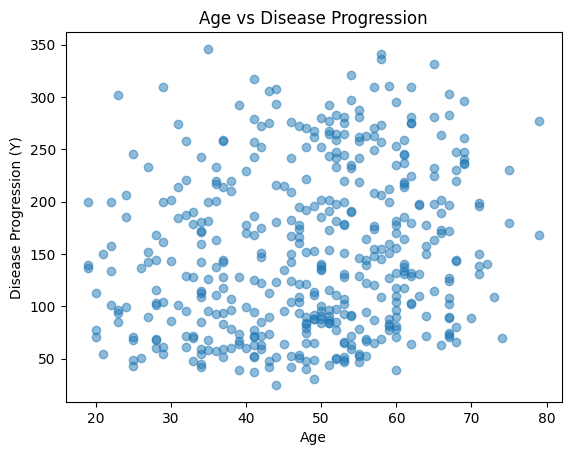

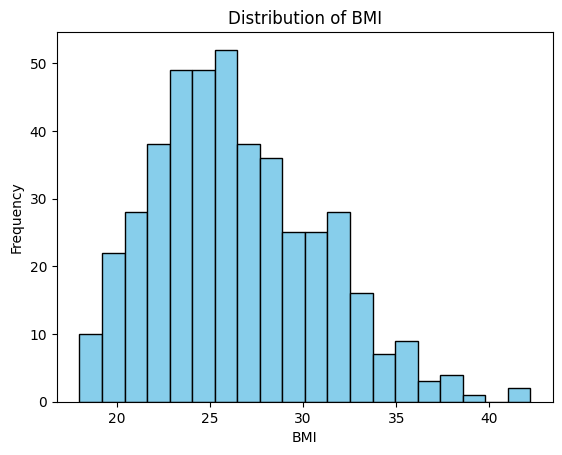

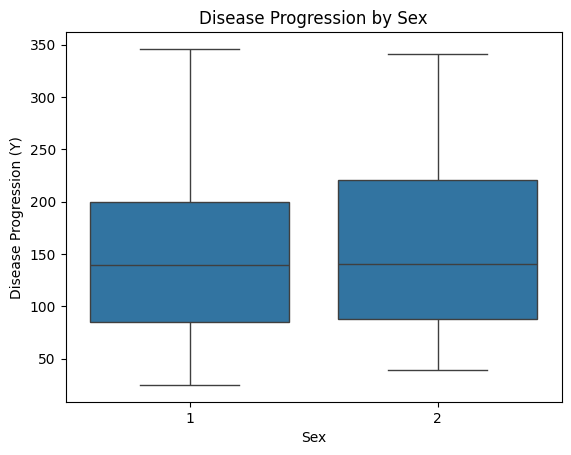

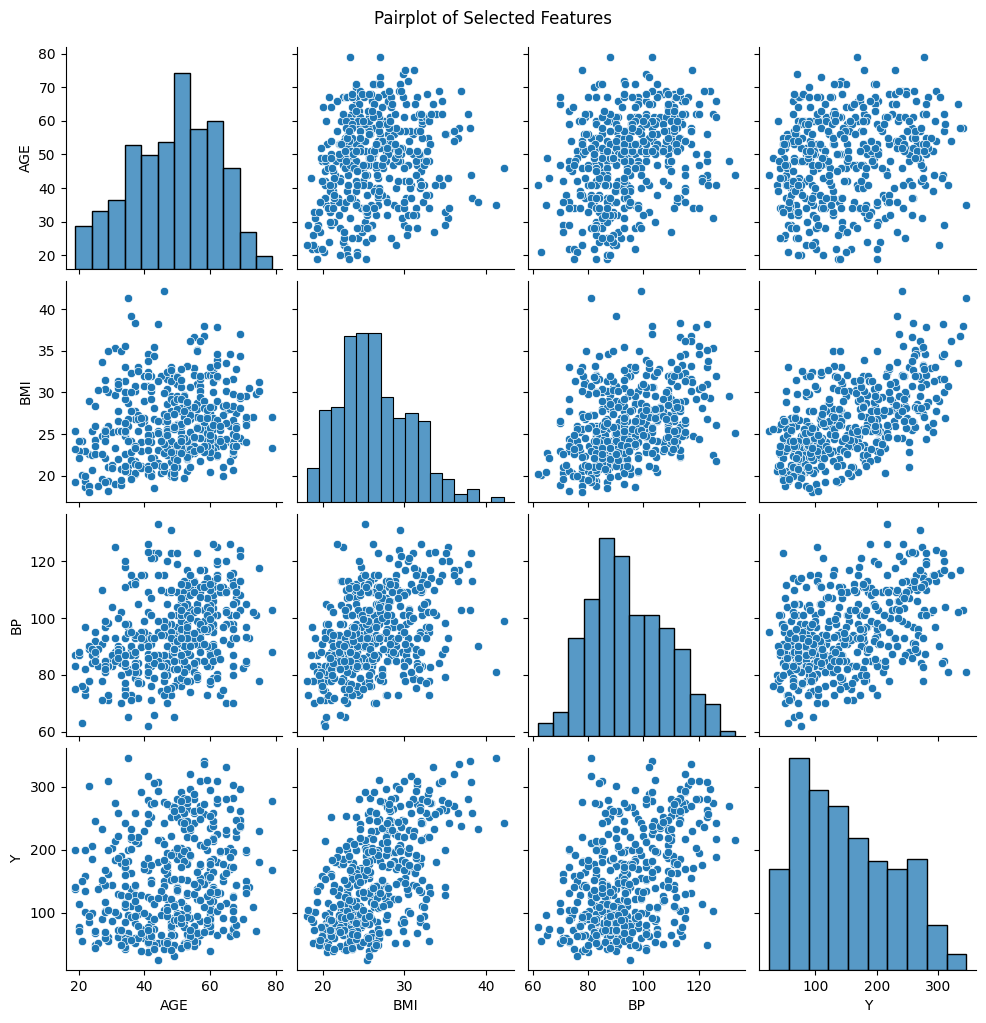

In [6]:
import seaborn as sns

# Example 1: Simple line plot with matplotlib
plt.plot(df['AGE'], df['Y'], 'o', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Disease Progression (Y)')
plt.title('Age vs Disease Progression')
plt.show()

# Example 2: Histogram with matplotlib
plt.hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

# Example 3: Boxplot with seaborn
sns.boxplot(x='SEX', y='Y', data=df)
plt.xlabel('Sex')
plt.ylabel('Disease Progression (Y)')
plt.title('Disease Progression by Sex')
plt.show()

# Example 4: Pairplot with seaborn
sns.pairplot(df[['AGE', 'BMI', 'BP', 'Y']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

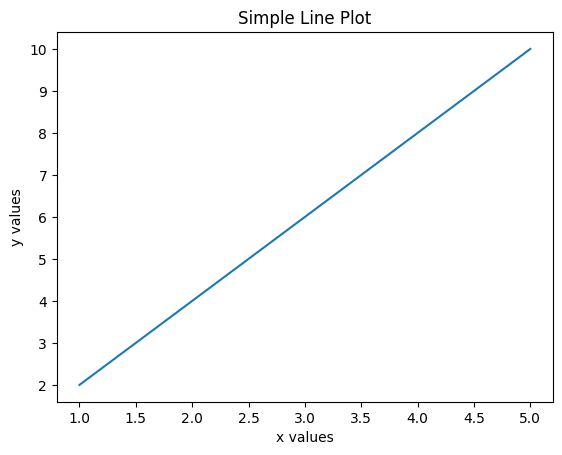

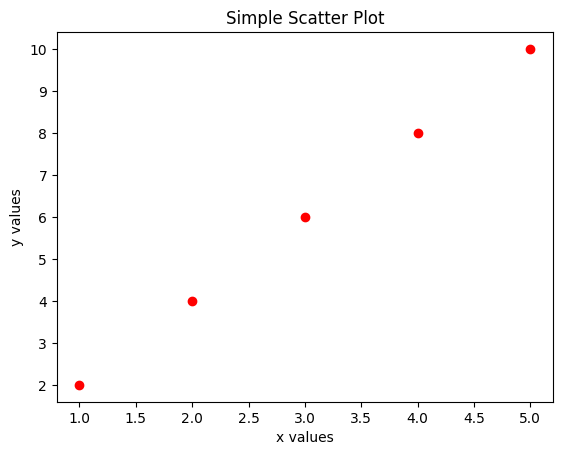

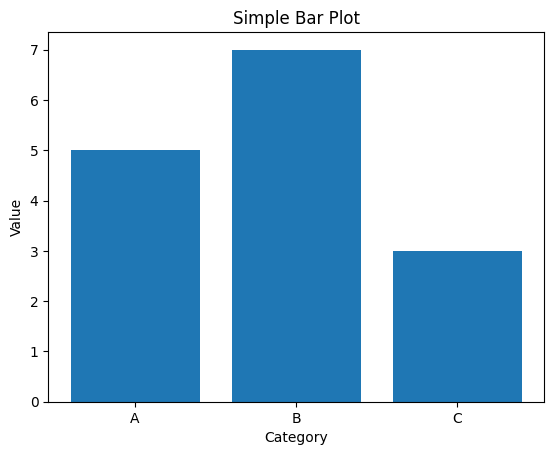

In [5]:
import matplotlib.pyplot as plt

# Example 1: Line plot
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
plt.plot(x, y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Simple Line Plot')
plt.show()

# Example 2: Scatter plot
plt.scatter(x, y, color='red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Simple Scatter Plot')
plt.show()

# Example 3: Bar plot
categories = ['A', 'B', 'C']
values = [5, 7, 3]
plt.bar(categories, values)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Simple Bar Plot')
plt.show()